In [1]:
# Importación de dependencias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from pathlib import Path
import joblib

In [ ]:
# Carga del dataset
data = np.load("../data/synthetic_2d.npz")
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

# Clasificador base
clf = LogisticRegression() # Modelo seleccionado
clf.fit(X_train, y_train) # Entrenamos el modelo con las varibles de entrenamiento

#
y_pred = clf.predict(X_test) # Devuelve 0 o 1
y_proba = clf.predict_proba(X_test)[:, 1] # Devuevle valor exacto de predicción, ej. 0.48, y nos quedamos con la columna 1

# Otenemos valores de rendimiento
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Ploteamos valores de rendimiento
print(f"Accuracy: {acc:.4f}") # Exactitud, Aciertos / Muestras
print(f"ROC-AUC:  {auc:.4f}") # Mide que tan bien separa las clases (Más cercano a 1 mejores valores)

# Creamos la carpeta data sino existe
Path("../classifiers").mkdir(exist_ok=True, parents=True)

# Guardamos el modelo entrenado en un archivo
joblib.dump(clf, "../classifiers/logreg_synthetic_2d.joblib")

Accuracy: 0.9875
ROC-AUC:  0.9997


['../classifiers/logreg_synthetic_2d.joblib']

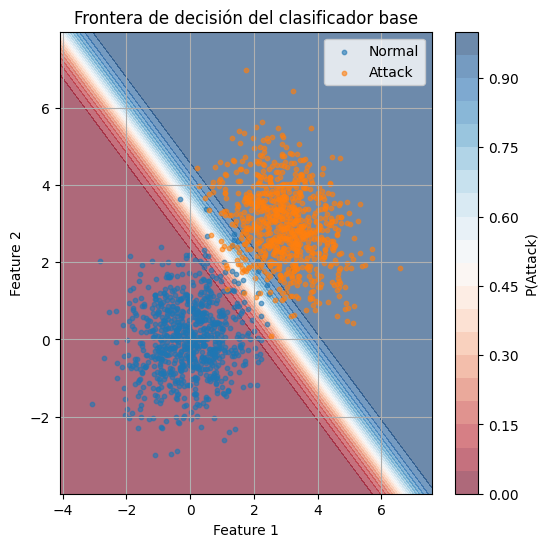

In [3]:
# Malla para visualizar la frontera
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, probs, levels=20, alpha=0.6, cmap="RdBu")
plt.colorbar(label="P(Attack)")

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], s=10, alpha=0.6, label="Normal")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], s=10, alpha=0.6, label="Attack")

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Frontera de decisión del clasificador base")
plt.grid(True)
plt.show()
